<a href="https://colab.research.google.com/github/samas-sha/Git-project/blob/main/intermediate_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# libraries

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,f1_score

In [5]:
train_data=pd.read_csv("/content/train_LZdllcl.csv")
test_data=pd.read_csv("/content/test_2umaH9m.csv")

# Data Analysis

In [75]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [76]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [77]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [15]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [16]:
train_data.nunique()

,0
employee_id,54808
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,10
age,41
previous_year_rating,5
length_of_service,35


In [17]:
train_data.size

767312

In [18]:
train_data.shape

(54808, 14)

In [19]:
test_data.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [20]:
test_data['previous_year_rating']=test_data['previous_year_rating'].fillna(test_data['previous_year_rating'].median())

In [21]:
train_data.duplicated().sum()

np.int64(0)

In [22]:
train_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [23]:
train_data['is_promoted'].value_counts()

,count
is_promoted,
0,50140
1,4668


In [27]:
categorical=list(train_data.select_dtypes(include=['object']).columns)
numerical=list(train_data.select_dtypes(include=['number']).columns)
print(categorical)
print(numerical)

['department', 'region', 'education', 'gender', 'recruitment_channel']
['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']


array([[<Axes: title={'center': 'employee_id'}>,
        <Axes: title={'center': 'no_of_trainings'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'previous_year_rating'}>,
        <Axes: title={'center': 'length_of_service'}>,
        <Axes: title={'center': 'KPIs_met >80%'}>],
       [<Axes: title={'center': 'awards_won?'}>,
        <Axes: title={'center': 'avg_training_score'}>,
        <Axes: title={'center': 'is_promoted'}>]], dtype=object)

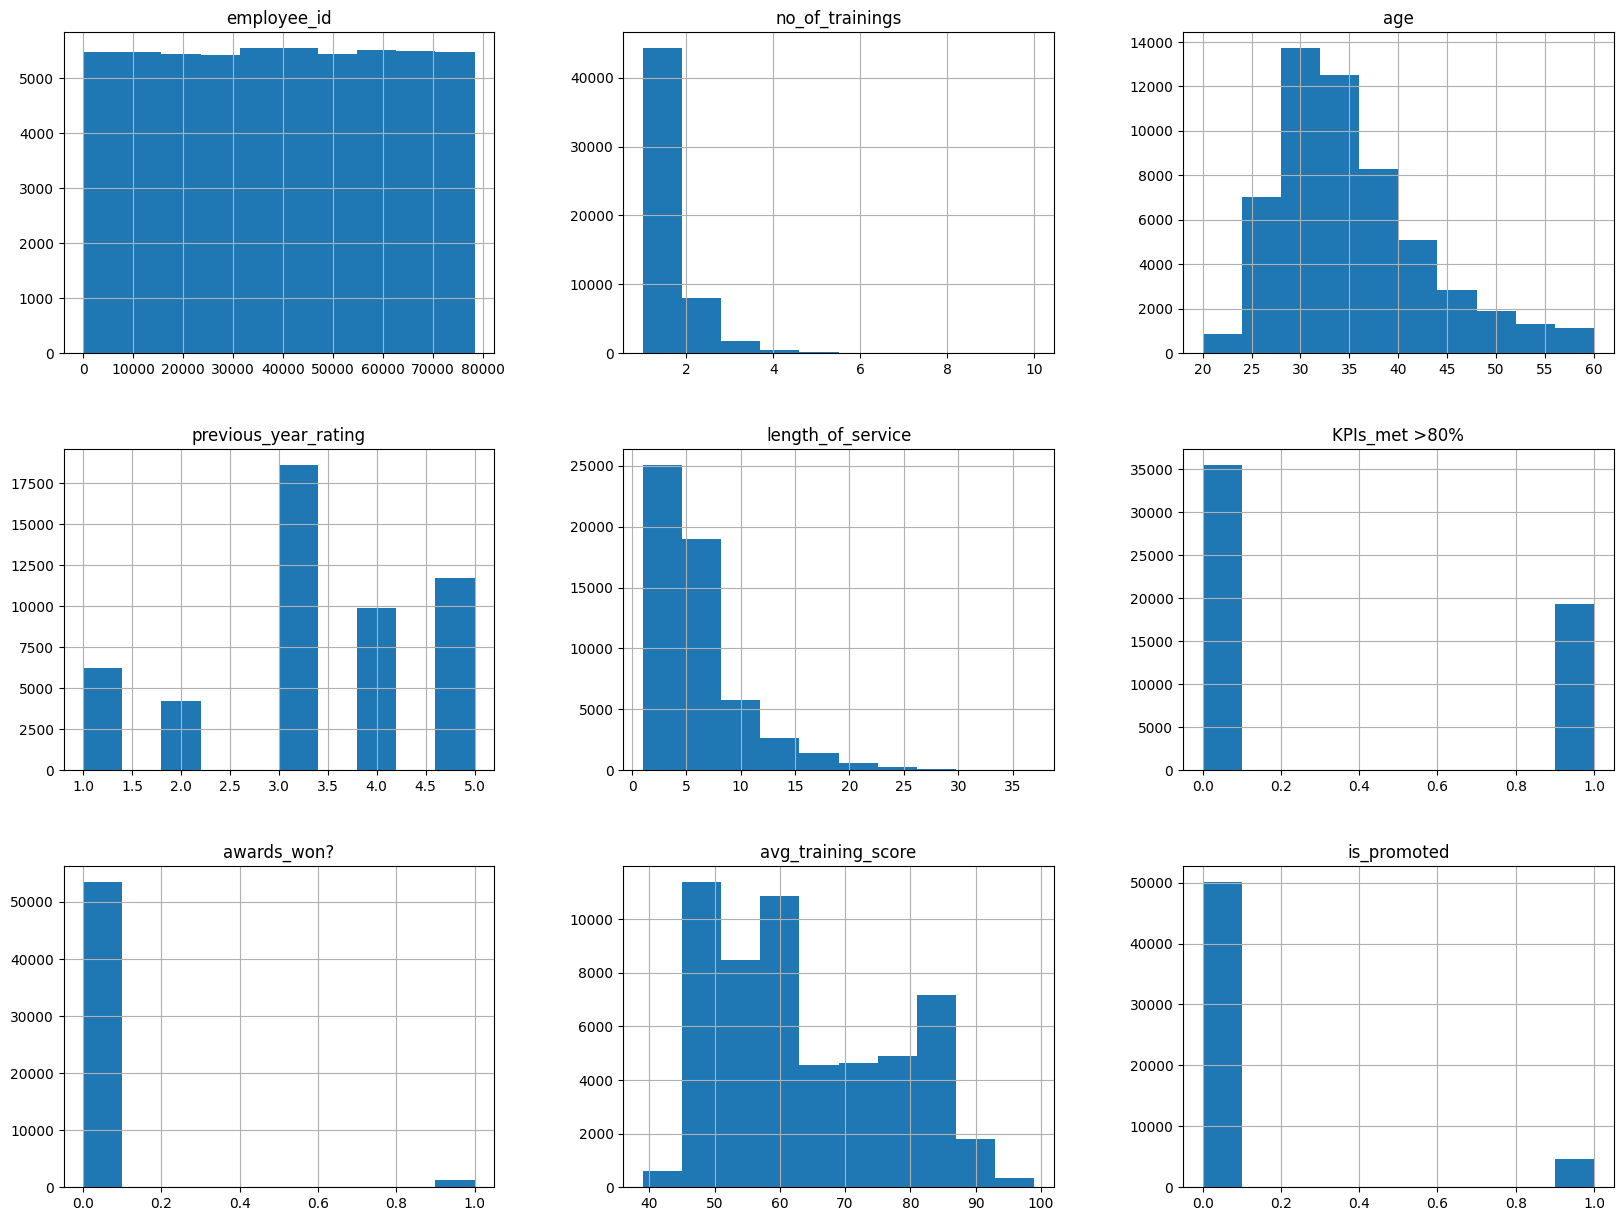

In [28]:
freqgraph=train_data.select_dtypes(include='number')
freqgraph.hist(figsize=(20,15))

In [29]:
mode_education= train_data['education'].mode()[0]
train_data['education'].fillna(mode_education,inplace=True)
#filled with mode

/tmp/ipython-input-1978609096.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['education'].fillna(mode_education,inplace=True)


In [30]:
train_data['previous_year_rating']=train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].median())

In [31]:
train_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


# Outliers

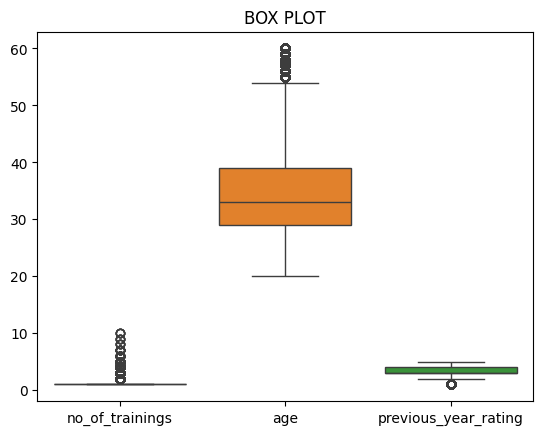

In [78]:
sns.boxplot(data=train_data[['no_of_trainings', 'age', 'previous_year_rating']])
plt.title("BOX PLOT")
plt.show()

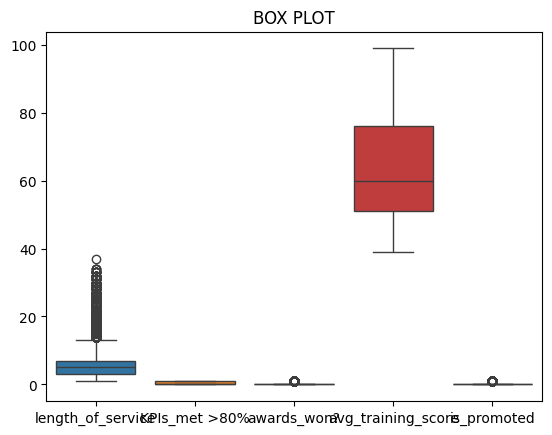

In [33]:
sns.boxplot(data=train_data[['length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']])
plt.title("BOX PLOT")
plt.show()

<Axes: >

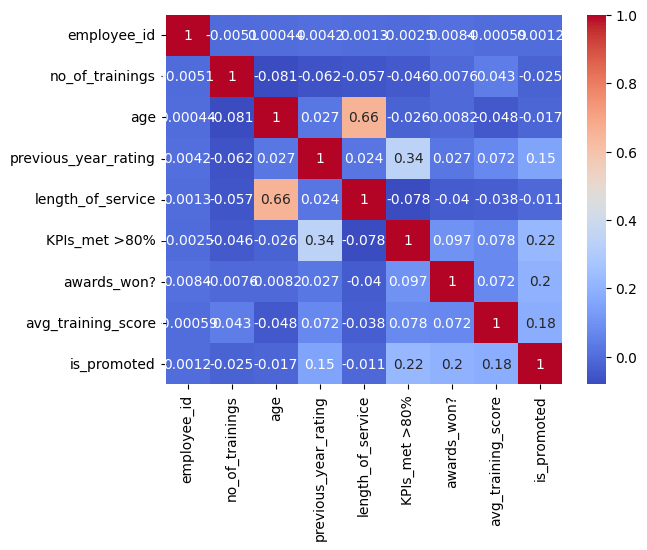

In [34]:
trn1=train_data.select_dtypes(include=['number'])
corr=trn1.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')


In [38]:
hr_train_data=train_data.drop(['employee_id'],axis=1)

In [39]:
emp_id=test_data['employee_id']
#saving employee id

In [40]:
hr_test_data=test_data.drop(['employee_id'],axis=1)

##Encoding


In [41]:
hr_data_test=pd.get_dummies(hr_test_data)

In [42]:
X=hr_train_data.drop('is_promoted',axis=1)
y=hr_train_data['is_promoted']

In [43]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", X_train.shape)
print("Shape of x_valid: ", X_valid.shape)
print("Shape of Y_train: ", y_train.shape)
print("Shape of Y_valid: ", y_valid.shape)

Shape of x_train:  (43846, 12)
Shape of x_valid:  (10962, 12)
Shape of Y_train:  (43846,)
Shape of Y_valid:  (10962,)


In [44]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)


##Scaling

In [45]:
X = pd.get_dummies(X)

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=0
)

sscaler = StandardScaler()
X_train = sscaler.fit_transform(X_train)
X_test = sscaler.transform(hr_data_test)
X_valid = sscaler.transform(X_valid)


##Model Building

In [46]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Training Accuracy :", rf.score(X_train, y_train))
print("Validation Accuracy :", rf.score(X_valid, y_valid))

Training Accuracy : 0.9997035077316061
Validation Accuracy : 0.9351395730706076


In [73]:
# Predict on validation set
y_valid_pred = rf.predict(X_valid)

# Metrics
accuracy = accuracy_score(y_valid, y_valid_pred)
precision = precision_score(y_valid, y_valid_pred)
recall = recall_score(y_valid, y_valid_pred)
f1 = f1_score(y_valid, y_valid_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

# Confusion Matrix
cm = confusion_matrix(y_valid, y_valid_pred)
print("Confusion Matrix:\n", cm)


Accuracy : 0.9351395730706076
Precision: 0.8260869565217391
Recall   : 0.2888165038002172
F1 Score : 0.42799678197908286
Confusion Matrix:
 [[9985   56]
 [ 655  266]]


###Logistic Regression Model


In [72]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Training Accuracy :", lr.score(X_train, y_train))
print("Validation Accuracy :", lr.score(X_valid, y_valid))

Training Accuracy : 0.931555900196141
Validation Accuracy : 0.9330414158000365


In [49]:
# Evaluation
y_valid_pred = lr.predict(X_valid)

print("Accuracy :", accuracy_score(y_valid, y_valid_pred))
print("Precision:", precision_score(y_valid, y_valid_pred))
print("Recall   :", recall_score(y_valid, y_valid_pred))
print("F1 Score :", f1_score(y_valid, y_valid_pred))

print("Confusion Matrix:\n", confusion_matrix(y_valid, y_valid_pred))

Accuracy : 0.9330414158000365
Precision: 0.8025889967637541
Recall   : 0.2692725298588491
F1 Score : 0.4032520325203252
Confusion Matrix:
 [[9980   61]
 [ 673  248]]


##KNN Model

In [79]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print("Training Accuracy :", knn.score(X_train, y_train))
print("Validation Accuracy :", knn.score(X_valid, y_valid))

Training Accuracy : 0.9259909683893628
Validation Accuracy : 0.9149790184272943


In [53]:
#evaluation
y_valid_pred = knn.predict(X_valid)

print("Accuracy :", accuracy_score(y_valid, y_valid_pred))
print("Precision:", precision_score(y_valid, y_valid_pred))
print("Recall   :", recall_score(y_valid, y_valid_pred))
print("F1 Score :", f1_score(y_valid, y_valid_pred))

print("Confusion Matrix:\n", confusion_matrix(y_valid, y_valid_pred))

Accuracy : 0.9149790184272943
Precision: 0.4773662551440329
Recall   : 0.1259500542888165
F1 Score : 0.19931271477663232
Confusion Matrix:
 [[9914  127]
 [ 805  116]]


In [54]:
results = []
def evaluate_model(model, model_name):
    y_valid_pred = model.predict(X_valid)

    results.append({
        "Model": model_name,
        "Train Accuracy": model.score(X_train, y_train),
        "Validation Accuracy": accuracy_score(y_valid, y_valid_pred),
        "Precision": precision_score(y_valid, y_valid_pred),
        "Recall": recall_score(y_valid, y_valid_pred),
        "F1 Score": f1_score(y_valid, y_valid_pred)
    })


In [55]:
# Random Forest
evaluate_model(rf, "Random Forest")

# Logistic Regression
evaluate_model(lr, "Logistic Regression")

# SVM
#evaluate_model(svm, "SVM")

# KNN
evaluate_model(knn, "KNN")


In [56]:
results_df = pd.DataFrame(results)
results_df


,Model,Train Accuracy,Validation Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.999704,0.935140,0.826087,0.288817,0.427997
1,Logistic Regression,0.931556,0.933041,0.802589,0.269273,0.403252
2,KNN,0.925991,0.914979,0.477366,0.125950,0.199313


##Model Tuning


In [68]:
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 15],
    'criterion': ['gini', 'entropy']
}

rf_base = RandomForestClassifier(random_state=42)

tuned_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=3,
    cv=2,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("Starting ultra-fast search...")
tuned_search.fit(X_train, y_train)

best_rf_model = tuned_search.best_estimator_
print("Done! Best Params:", tuned_search.best_params_)

Starting ultra-fast search...
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Done! Best Params: {'n_estimators': 50, 'max_depth': 15, 'criterion': 'entropy'}


In [67]:
val_pred_original = rf.predict(X_valid)
val_pred_tuned = best_rf_model.predict(X_valid)

metrics = {
    'Metric': ['Accuracy', 'F1-Score'],
    'Before Tuning': [
        accuracy_score(y_valid, val_pred_original),
        f1_score(y_valid, val_pred_original)
    ],
    'After Tuning': [
        accuracy_score(y_valid, val_pred_tuned),
        f1_score(y_valid, val_pred_tuned)
    ]
}

comparison_df = pd.DataFrame(metrics)
print("Model Performance Comparison (Validation Set) ")
print(comparison_df)

improvement = ((metrics['After Tuning'][1] - metrics['Before Tuning'][1]) / metrics['Before Tuning'][1]) * 100
print(f"\nOverall F1-Score Improvement: {improvement:.2f}%")

Model Performance Comparison (Validation Set) 
     Metric  Before Tuning  After Tuning
0  Accuracy       0.935140      0.527002
1  F1-Score       0.427997      0.131345

Overall F1-Score Improvement: -69.31%


In [69]:

rf_pred_tuned = best_rf_model.predict(X_test)


sub_rf_tuned = pd.DataFrame({'employee_id': emp_id, 'is_promoted': rf_pred_tuned})

In [70]:
print(sub_rf_tuned['is_promoted'].value_counts())

is_promoted
0    23158
1      332
Name: count, dtype: int64


In [71]:
from google.colab import files

sub_rf_tuned.to_csv('submission_rf_tuned.csv', index=False)

files.download('submission_rf_tuned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>